In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
movie = pd.read_csv("./data/IMDB-Movie-Data.csv")

## 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [5]:
# 评分平均分
movie['Rating'].mean()

6.723200000000003

In [7]:
# 一共有多少个导演
len(np.unique(movie['Director']))

644

In [8]:
np.unique(movie['Director']).shape

(644,)

## 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？

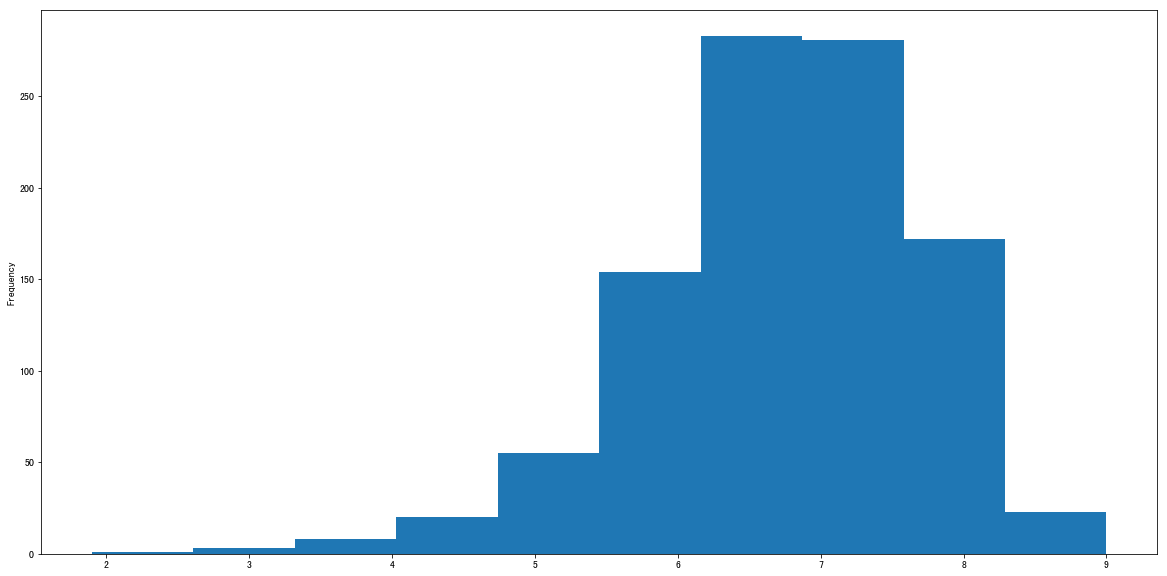

In [10]:
movie['Rating'].plot(kind='hist',figsize=(20,10))

In [19]:
# 构造刻度,组局20 构造21个刻度
max_ = movie['Rating'].max()
min_ = movie['Rating'].min()
t1 = np.linspace(max_,min_,21)

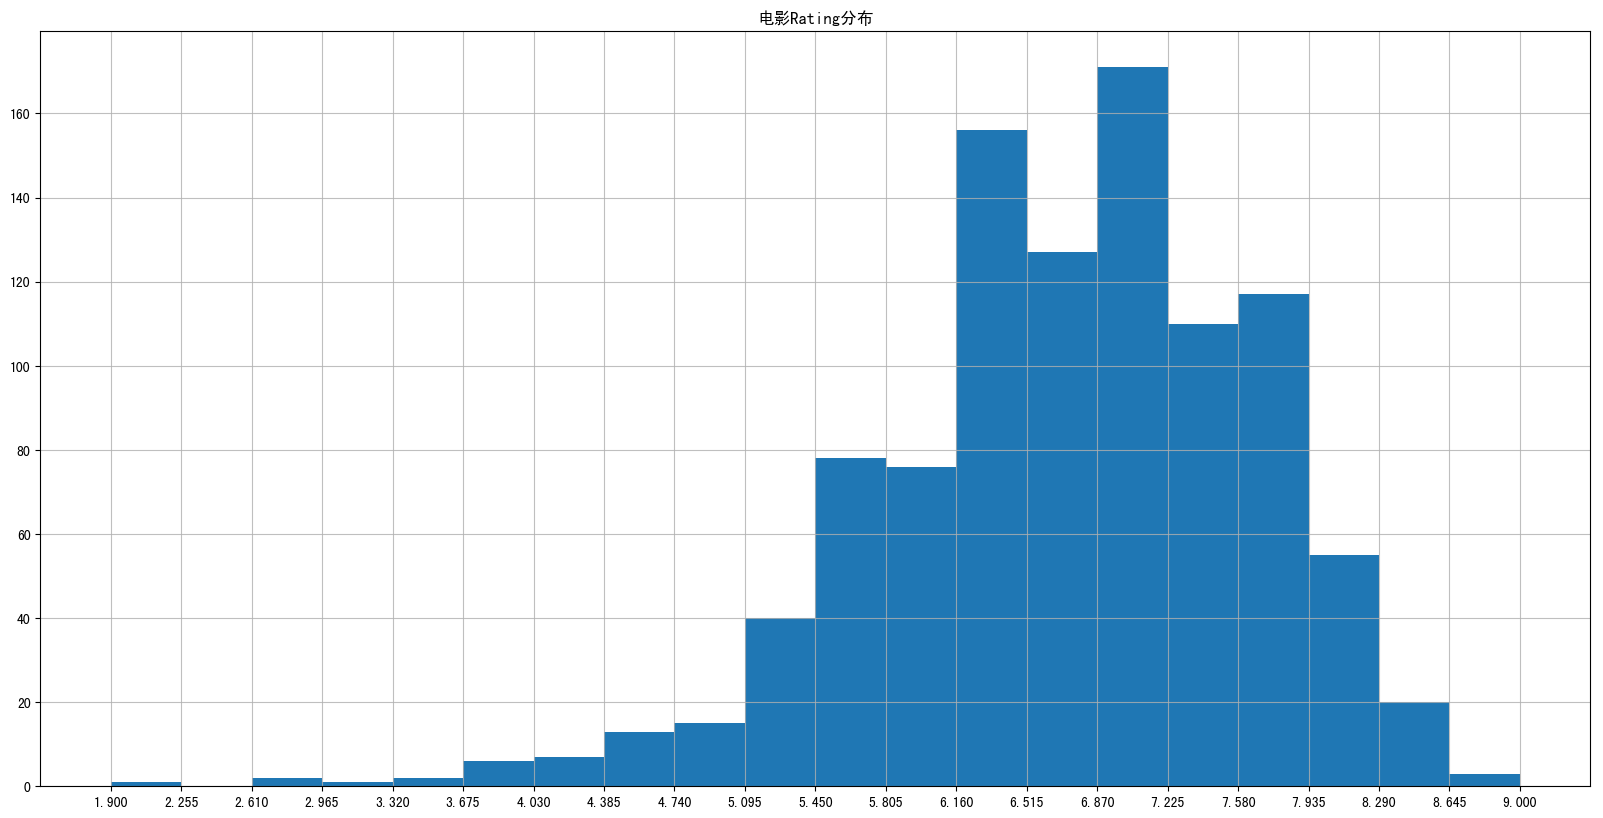

In [18]:
# 创建画布
plt.figure(figsize=(20,10),dpi=100)
# 绘制图像
plt.hist(movie["Rating"],bins=20)
plt.xticks(t1)
# 绘制网格
plt.grid(True,alpha=0.8,linestyle="-")
# 添加标题
plt.title("电影Rating分布")
# 显示图像
plt.show()

In [20]:
# 构造刻度
min_ = movie['Runtime (Minutes)'].min()
max_ = movie['Runtime (Minutes)'].max()
t1 = np.linspace(max_,min_,21)

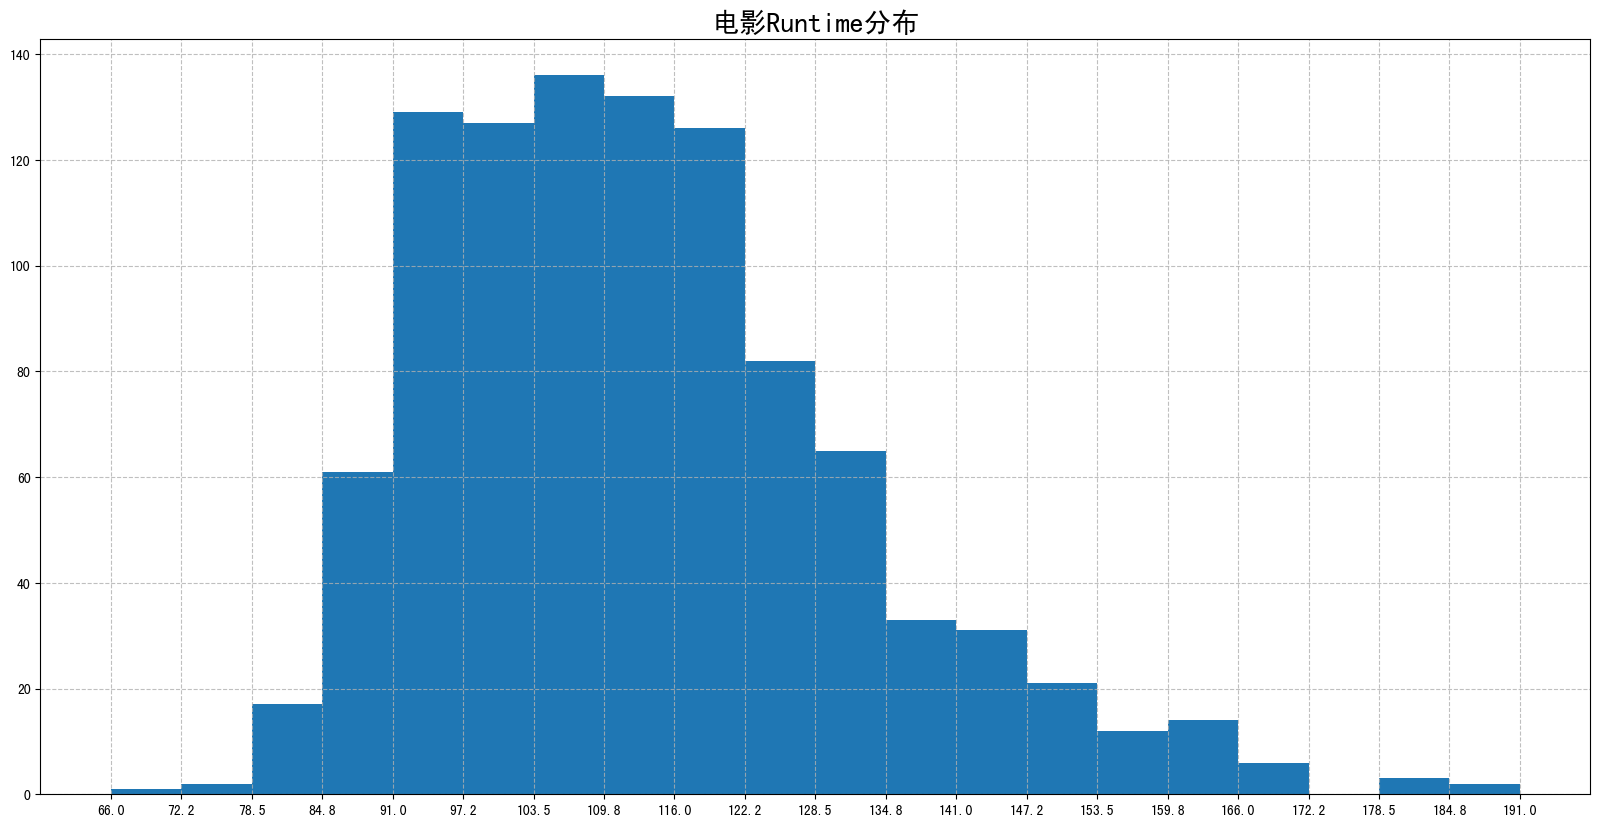

In [21]:
# 创建画布
plt.figure(figsize=(20,10),dpi=100)
# 绘制图像
plt.hist(movie['Runtime (Minutes)'],bins=20)
plt.xticks(t1)
# 绘制网格
plt.grid(True,alpha=0.8,linestyle="--")
# 添加标题
plt.title("电影Runtime分布",fontsize=20)
# 显示图像
plt.show()

### 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [22]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [23]:
# 将演员表字符串切割成列表
tem_list = [i.split(",") for i in movie['Genre']]

In [28]:
print(tem_list,len(tem_list))

[['Action', 'Adventure', 'Sci-Fi'], ['Adventure', 'Mystery', 'Sci-Fi'], ['Horror', 'Thriller'], ['Animation', 'Comedy', 'Family'], ['Action', 'Adventure', 'Fantasy'], ['Action', 'Adventure', 'Fantasy'], ['Comedy', 'Drama', 'Music'], ['Comedy'], ['Action', 'Adventure', 'Biography'], ['Adventure', 'Drama', 'Romance'], ['Adventure', 'Family', 'Fantasy'], ['Biography', 'Drama', 'History'], ['Action', 'Adventure', 'Sci-Fi'], ['Animation', 'Adventure', 'Comedy'], ['Action', 'Comedy', 'Drama'], ['Animation', 'Adventure', 'Comedy'], ['Biography', 'Drama', 'History'], ['Action', 'Thriller'], ['Biography', 'Drama'], ['Drama', 'Mystery', 'Sci-Fi'], ['Adventure', 'Drama', 'Thriller'], ['Drama'], ['Crime', 'Drama', 'Horror'], ['Animation', 'Adventure', 'Comedy'], ['Action', 'Adventure', 'Sci-Fi'], ['Comedy'], ['Action', 'Adventure', 'Drama'], ['Horror', 'Thriller'], ['Comedy'], ['Action', 'Adventure', 'Drama'], ['Comedy'], ['Drama', 'Thriller'], ['Action', 'Adventure', 'Sci-Fi'], ['Action', 'Advent

In [29]:
movie_list = []
for i in tem_list:
    movie_list.extend(i)
movie_list = np.unique(movie_list)
len(movie_list)

20

In [30]:
movie_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [31]:
# 构建空表
temp = pd.DataFrame(np.zeros([movie.shape[0],movie_list.shape[0]]),columns=movie_list)

In [33]:
for i in range(movie.shape[0]):
    temp.ix[i,tem_list[i]] = 1

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


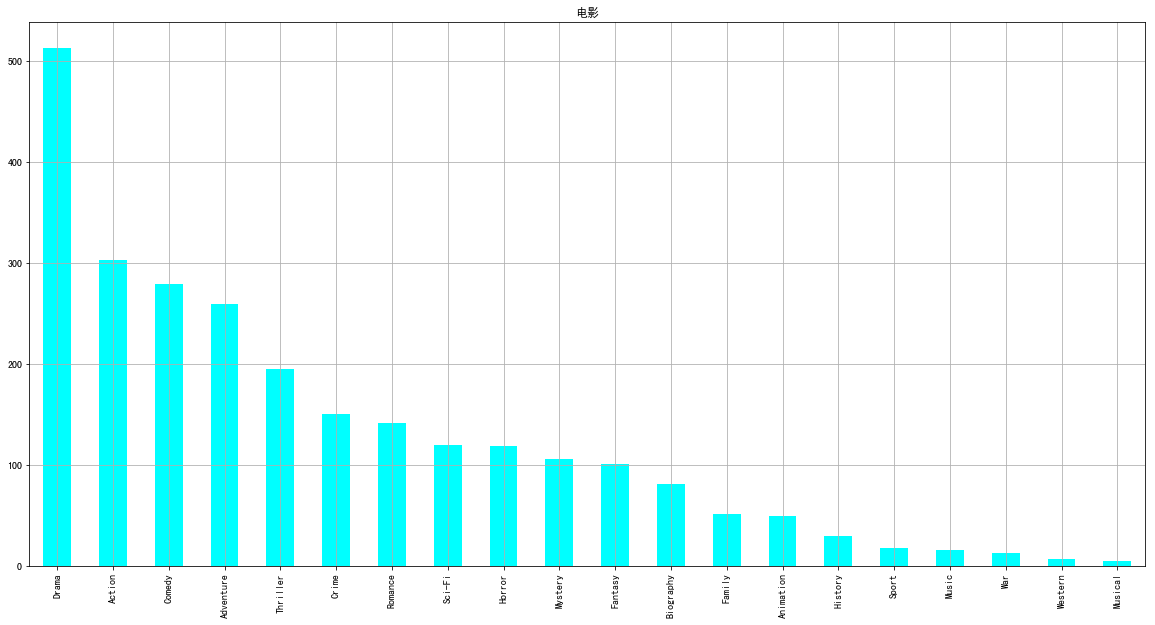

In [36]:
temp.sum().sort_values(ascending=False).plot(kind="bar",figsize=(20,10),title='电影',grid=True,colormap='cool')

In [37]:
movie.shape[0]

1000

In [38]:
movie_list.shape[0]

20

In [40]:
tem_list[0]

['Action', 'Adventure', 'Sci-Fi']